In [1]:
# !pip install mglearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display
import mglearn

# 경고메시지 무시
import warnings
warnings.filterwarnings(action='ignore') # action = 'default' 경고매시지 표시

# 데이터셋 로딩

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
type(iris)

sklearn.utils.Bunch

## iris dataset 탐색

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
type(iris['data'])

numpy.ndarray

In [9]:
iris['data'].shape

(150, 4)

In [10]:
iris['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [11]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['species'] = iris.target

In [12]:
df['species'] 

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [13]:
# unique() : 중복을 제거하고 고유값만 추출
# 시리즈단위로 할때 value_counts() : 개별 요소의 건수를 반환하는 함수

df['species'].unique()

array([0, 1, 2])

In [14]:
df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [15]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
df['species'][:49] = 'setosa'

Dict = {0:'setosa', 1:'versicolor', 2:'virginica'}

In [17]:
df['species'] = df[Dict].keys()

KeyError: "None of [Int64Index([0, 1, 2], dtype='int64')] are in the [columns]"

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    test_size=0.2, random_state=0)

In [19]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

## 분류 알고리즘 : 의사결정 트리(DecisionTreeClassifier)
- 분류와 회귀에 사용되는 지도학습 알고리즘
- 데이터 특성으로 부터 추론된 결정규칙을 통해 값을 예측
- if-then-else 결정 규칙을 통해 데이터 학습
- 트리의 깊이가 깊을수록 복잡한 모델이 된다.
- 결정트리의 장점
  - 이해와 해석이 쉽다
  - 시간화가 용이하다
  - 많은 데이터의 전치리가 필요하지 않다
  - 수치형과 범주형 데이터 모두를 다룰 수 있다

In [20]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state = 121)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=121)

### 트리구조를 시각화 하는 캐키지 graphviz

In [21]:
import graphviz

In [22]:
from sklearn.tree import export_graphviz

# export_graphviz(모델객체, 출력파일명,     결정트리클래스밍칭,    결정트리피처명칭, 옵션 : 분순도포시, 색상)
export_graphviz(dtree, out_file='tree.dot', class_names=iris.target_names, feature_names=iris.feature_names, 
               impurity=True, filled=True)

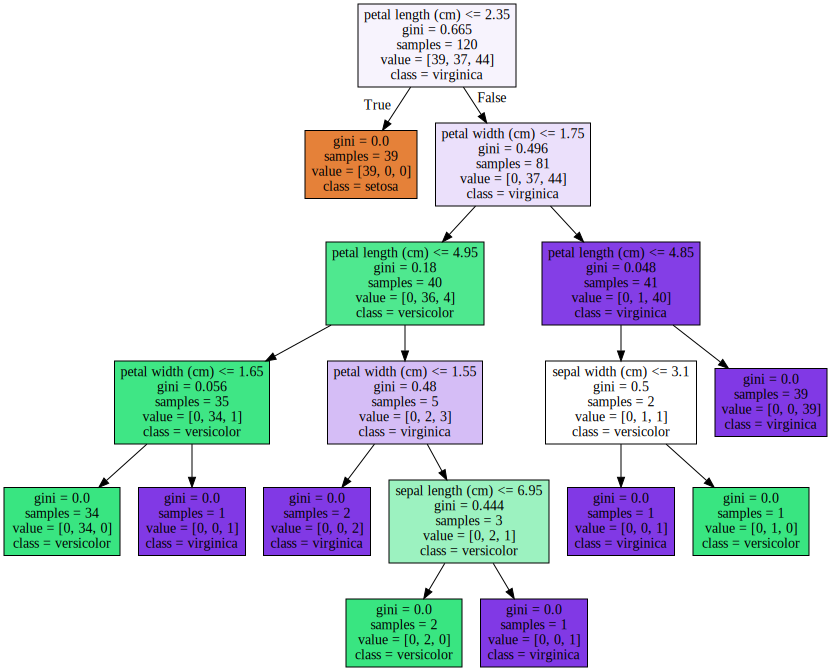

In [23]:
# open(filename, mode)
# mode : r(default), w, a
# graphviz 파이썬 래퍼 모듈을 호출해 결정트리 규칙을 시각화한다.

with open('tree.dot') as f :
    dot_graph = f.read()

src = graphviz.Source(dot_graph)
src

In [24]:
# 결정트리를 pdf 파일로 샌성 : Source.gv, Source.gv.pdf 두개의 파일이 생성된다
src.view()

'Source.gv.pdf'

In [25]:
# 가지 많으면 모델이 복잡해지고 과대적합 높아짐 -> 과대적합 해결해야 함
#  해결1 -> 기지를 치고 
#  해결2 -> 단노드 자식을 갖고있 지않는 노드(클래스의 분류 끝) 샘플너무 오는 건수가 몇개 이상이면 더이상 분류하지 않게
#  depth - 래벨과 연관이 되어 있음 (조절하는 것이 )
#  하이퍼 파라미터값 1개만 넣어서 (for문 확습을 충분히 훈련시킴 가장 최접의 값 찾가)
#  

In [26]:
# 평가 ***정확도라고 볼수 없음***
print(dtree.score(X_train, y_train))
print(dtree.score(X_test, y_test))

# 100% 예측할 수 없다

1.0
1.0


## DecisionTree의 중요 하이퍼파라미터 조정

In [27]:

model = DecisionTreeClassifier(min_samples_split= 4, random_state = 121)
model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=4, random_state=121)

In [28]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9833333333333333
0.9666666666666667


## feature 별 결정 트리 알고리즘의 중요도

In [29]:
model.feature_importances_

array([0.        , 0.        , 0.56028618, 0.43971382])

### feature 별 중요도 값 매칭

In [30]:
for name, value in zip(iris.feature_names, model.feature_importances_) :
    print('{}:{:.3f}'.format(name, value))

sepal length (cm):0.000
sepal width (cm):0.000
petal length (cm):0.560
petal width (cm):0.440


### feature 별 중요도 시각화

<AxesSubplot:>

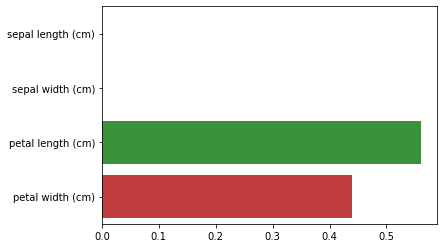

In [31]:
import seaborn as sns
sns.barplot(model.feature_importances_, iris.feature_names)

### 가지치기(Prunning)
1. Tree prunning : 의사결정 트리 모델의 과적합(Overfitting)을 줄이고, 일반화 가능성을 증대시킬 수 있는 subtree를 찾는 과정
2. 가지치기 방법
  - cross_validation
  - independent validation set
 
3. Prunning logic
  - 가지치기 과정에서는 트리에 해당 데이터셋에 과도하게 최적화되지 않도록 결정트리의 최대깊이를 제한하고, leaf node의 최대 개수를 제한한다
  - 노드를 분할시키기 위해 필요한 '최소한의 데이터 개수' 를 지정한다.

In [32]:
model = DecisionTreeClassifier(max_depth = 3, random_state = 121)
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9666666666666667
0.9666666666666667


In [33]:
model = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 6, random_state = 121)
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9583333333333334
0.9666666666666667


### 교차검증

In [34]:
from sklearn.model_selection import cross_validate

scores = cross_validate(model, X_train, y_train)
scores

{'fit_time': array([0.        , 0.00099707, 0.01196885, 0.        , 0.00099874]),
 'score_time': array([0.0009954, 0.       , 0.       , 0.0009973, 0.       ]),
 'test_score': array([0.95833333, 0.91666667, 1.        , 0.95833333, 0.91666667])}

In [35]:
np.mean(scores['test_score'])

0.95

In [36]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(model, X_train, y_train, cv = StratifiedKFold())
np.mean(scores['test_score'])

0.95

### 그리드 서치(Grid Search)
- 결정 트리의 하이퍼피라미터 값을 바꿔가며 가장 좋은 성능이 나오는 모델을 찾는 작업
- 테스트 세트를 사용하지 않고 교차 검증을 통해서 좋은 모델을 고르면 된다.

In [37]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state = 2022)

params = {
    'max_depth':[2, 3, 4, 5, 6, None],
    'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9],
    'min_samples_split':[2, 3, 4, 5, 6, 7, 8, 9, 10]
}
#                                                      #돌림        코어제어(시스템모든 코어 사용함) : 이유 느리기때문에
gs = GridSearchCV(model, param_grid = params, cv = 3, refit = True, n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=2022),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [38]:
# 최적
model = gs.best_estimator_
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9666666666666667
0.9666666666666667


In [39]:
# 그리드 서치를 통해 찾은 최적의 매개변수
print(gs.best_params_)
#print(gs.best_score_)

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [40]:
# 최상의 교차 검증 점수 
np.max(gs.cv_results_['mean_test_score'])

0.9499999999999998

In [41]:
model = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 1, min_samples_split= 2, random_state = 121)
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9666666666666667
0.9666666666666667
